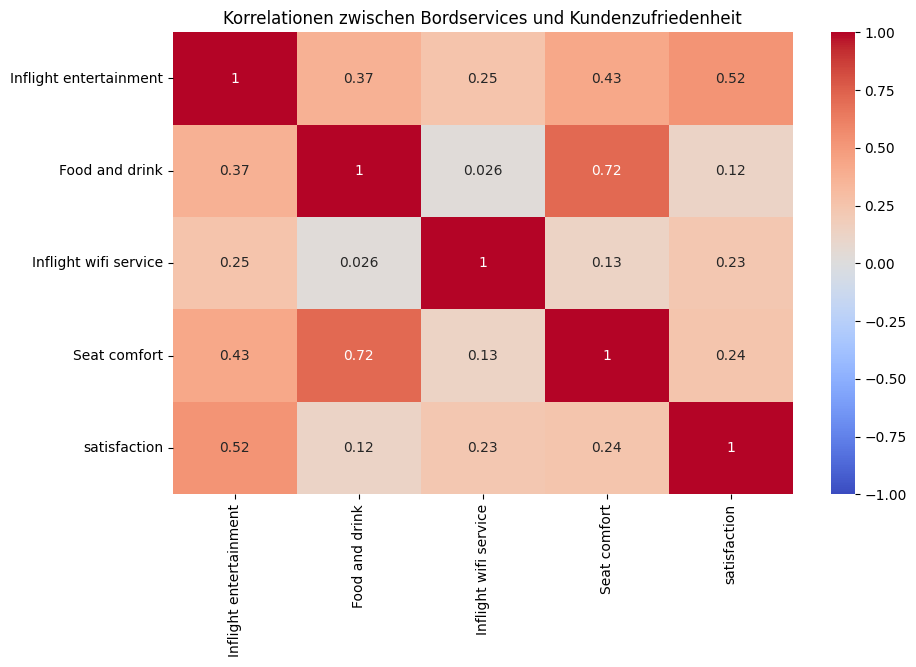

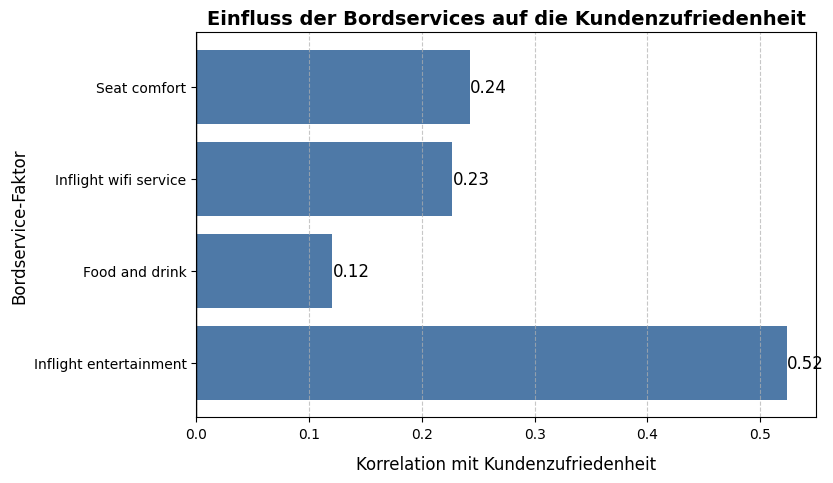

In [1]:
# Frage: Welche Bordservices (z. B. WLAN, Entertainment, Essen & Trinken) haben den größten Einfluss auf die Zufriedenheit?
#Ziel:Identifikation von Servicebereichen, die verbessert werden sollten, um eine höhere Zufriedenheit zu erreichen.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr, spearmanr

url = "https://raw.githubusercontent.com/DivinitasMaxima/BINA-REPO/refs/heads/main/data/data/Invistico_Airline.csv"
df = pd.read_csv(url)

# Umwandlung der Zielvariable ("Satisfaction") in binäre Werte
df["satisfaction"] = df["satisfaction"].map({"satisfied": 1, "dissatisfied": 0})

# Überblick über den Datensatz
df.head()

# Annahme, dass diese Bordservice-Spalten im Datensatz vorhanden sind
bord_services = ['Inflight entertainment', 'Food and drink', 'Inflight wifi service', 'Seat comfort']

# Wir wählen nur die relevanten Spalten für die Analyse
df_bord_services = df[bord_services + ['satisfaction']]

# Berechnen der Korrelationen zwischen den Bordservices und der Zufriedenheit
correlation_matrix = df_bord_services.corr()

# Anzeige der Korrelationen im Konsolen-Ausdruck
#print(correlation_matrix)

# Visualisierung der Korrelationen als Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Korrelationen zwischen Bordservices und Kundenzufriedenheit")
plt.show()

###################################
# Korrelation mit Zufriedenheit berechnen
correlations = df[bord_services + ['satisfaction']].corr()["satisfaction"].drop("satisfaction")
plt.figure(figsize=(8, 5))
bars = plt.barh(correlations.index, correlations.values, color=["#4E79A7" if x > 0 else "#F28E2B" for x in correlations.values])

# Werte an Balken anzeigen
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f"{bar.get_width():.2f}",
             va='center', ha='left', fontsize=12, color="black")

# Titel und Achsenbeschriftungen nach IBCS-Richtlinien
plt.xlabel("Korrelation mit Kundenzufriedenheit", fontsize=12, labelpad=10)
plt.ylabel("Bordservice-Faktor", fontsize=12)
plt.title("Einfluss der Bordservices auf die Kundenzufriedenheit", fontsize=14, weight='bold')
plt.axvline(0, color="black", linewidth=1)  # Vertikale Linie zur Trennung
plt.grid(axis='x', linestyle="--", alpha=0.7)  # Dezente Hilfslinien für bessere Lesbarkeit
plt.show()




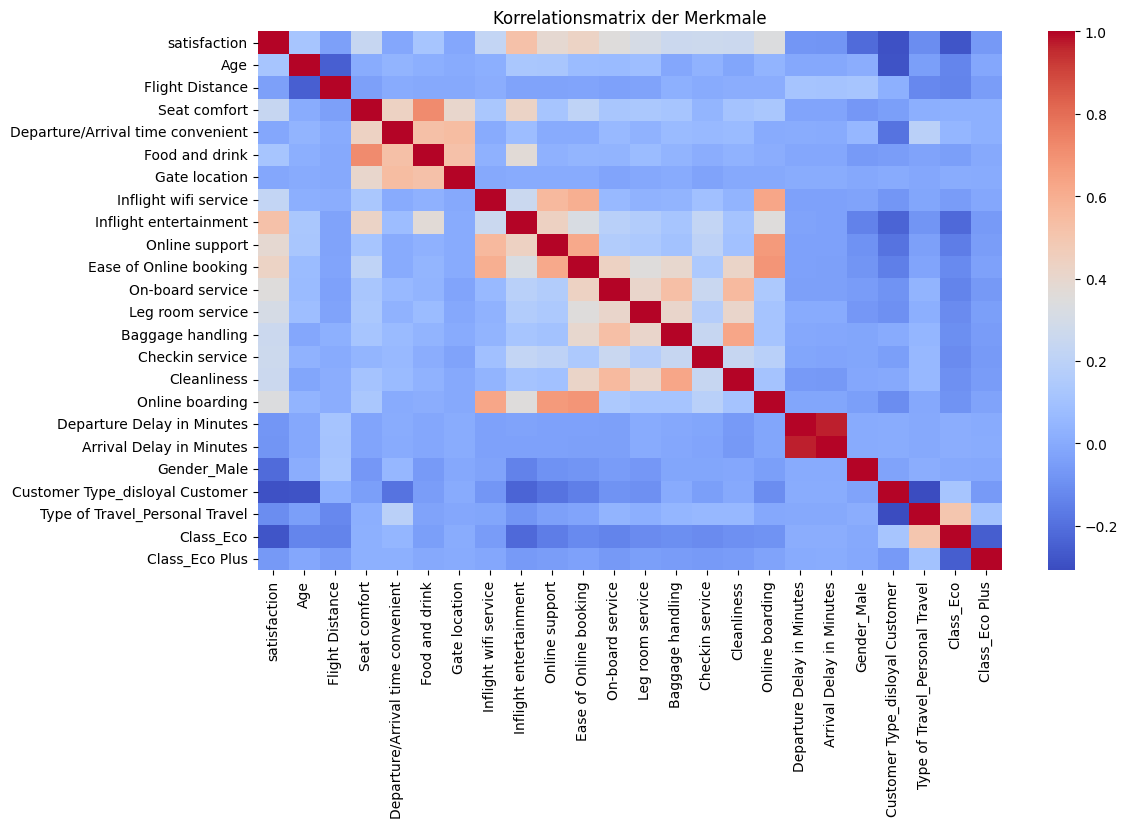

🔹 Wichtigste Einflussfaktoren basierend auf Korrelationen:
                      Feature  Korrelation mit Zufriedenheit
5      Inflight entertainment                       0.523364
7      Ease of Online booking                       0.432017
6             Online boarding                       0.338118
3            Leg room service                       0.305115
0                Seat comfort                       0.242371
2       Inflight wifi service                       0.227010
1              Food and drink                       0.120568
4  Departure Delay in Minutes                      -0.073960


<ipython-input-2-eb217e1b810b>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Korrelation mit Zufriedenheit", y="Feature", data=correlation_df, palette="coolwarm")


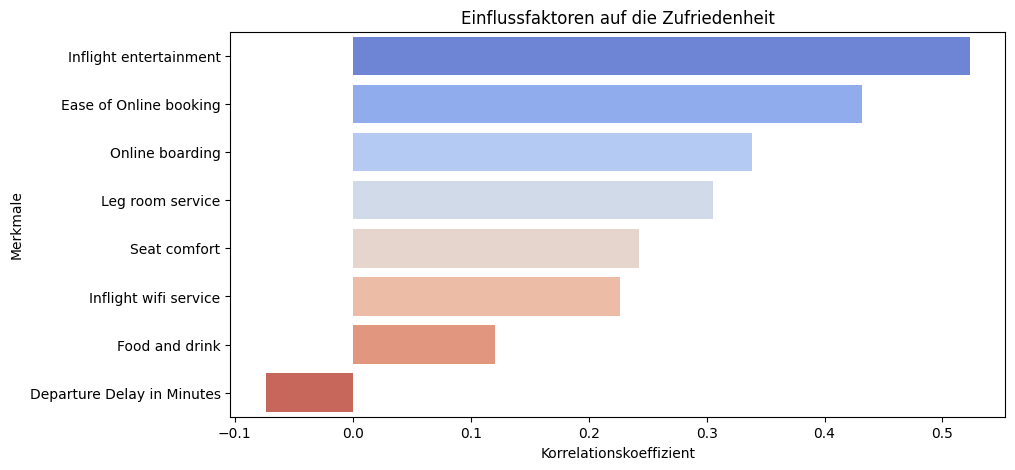

In [2]:
# Frage:Welche Faktoren beeinflussen die Kundenzufriedenheit am stärksten?
#Ziel:Identifikation der wichtigsten Einflussfaktoren, um gezielte Maßnahmen zur Verbesserung der Zufriedenheit abzuleiten.

# Import der benötigten Bibliotheken
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr, spearmanr

# Daten laden
url = "https://raw.githubusercontent.com/DivinitasMaxima/BINA-REPO/refs/heads/main/data/data/Invistico_Airline.csv"
df = pd.read_csv(url)

# Überblick über den Datensatz
df.head()

# Datenbereinigung
df.dropna(inplace=True)

# Umwandlung der Zielvariable ("Satisfaction") in binäre Werte
df["satisfaction"] = df["satisfaction"].map({"satisfied": 1, "dissatisfied": 0})

# Kategorische Variablen in numerische Werte umwandeln
categorical_cols = ["Gender", "Customer Type", "Type of Travel", "Class"]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Explorative Datenanalyse (EDA)
# Korrelationsmatrix erstellen
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Korrelationsmatrix der Merkmale")
plt.show()

# Statistische Analyse der Einflussfaktoren
features = ["Seat comfort", "Food and drink", "Inflight wifi service",
            "Leg room service", "Departure Delay in Minutes",
            "Inflight entertainment", "Online boarding", "Ease of Online booking"]

correlations = {}

for feature in features:
    if df[feature].dtype == "float64" or df[feature].dtype == "int64":
        corr, _ = pointbiserialr(df["satisfaction"], df[feature])  # Für numerische Variablen
    else:
        corr, _ = spearmanr(df["satisfaction"], df[feature])  # Für ordinale Variablen
    correlations[feature] = corr

# Ergebnisse als DataFrame speichern & sortieren
correlation_df = pd.DataFrame(list(correlations.items()), columns=["Feature", "Korrelation mit Zufriedenheit"])
correlation_df = correlation_df.sort_values(by="Korrelation mit Zufriedenheit", ascending=False)

print("🔹 Wichtigste Einflussfaktoren basierend auf Korrelationen:")
print(correlation_df)

# Visualisierung der wichtigsten Einflussfaktoren
plt.figure(figsize=(10, 5))
sns.barplot(x="Korrelation mit Zufriedenheit", y="Feature", data=correlation_df, palette="coolwarm")
plt.title("Einflussfaktoren auf die Zufriedenheit")
plt.xlabel("Korrelationskoeffizient")
plt.ylabel("Merkmale")
plt.show()


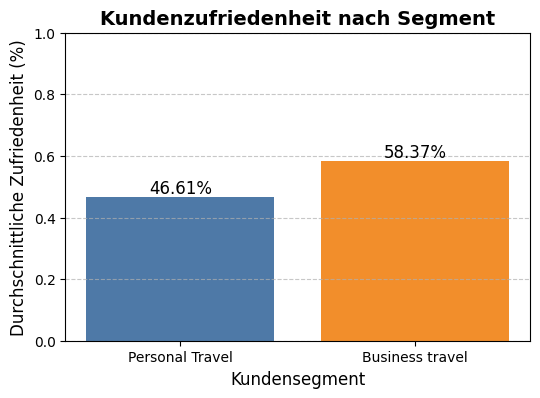

In [3]:
#Frage: Wie unterscheidet sich die Zufriedenheit zwischen Geschäftsreisenden und Urlaubsreisenden?
#Ziel: Verständnis der spezifischen Bedürfnisse und Erwartungen unterschiedlicher Kundengruppen.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Daten laden
url = "https://raw.githubusercontent.com/DivinitasMaxima/BINA-REPO/refs/heads/main/data/data/Invistico_Airline.csv"
df = pd.read_csv(url)

# Umwandlung der Zufriedenheits-Spalte
df["satisfaction"] = df["satisfaction"].map({"satisfied": 1, "dissatisfied": 0})

# Durchschnittliche Zufriedenheit pro Kundensegment berechnen
segment_satisfaction = df.groupby("Type of Travel")["satisfaction"].mean().sort_values()

# IBCS-gerechte Visualisierung
plt.figure(figsize=(6, 4))
bars = plt.bar(segment_satisfaction.index, segment_satisfaction.values,
               color=["#4E79A7", "#F28E2B"])  # Blau für höhere Zufriedenheit, Orange für niedrigere

# Werte direkt auf den Balken anzeigen
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{bar.get_height():.2%}",
             ha='center', va='bottom', fontsize=12, color="black")

# Titel & Achsenbeschriftungen (IBCS-konform)
plt.ylabel("Durchschnittliche Zufriedenheit (%)", fontsize=12)
plt.xlabel("Kundensegment", fontsize=12)
plt.title("Kundenzufriedenheit nach Segment", fontsize=14, weight='bold')
plt.ylim(0, 1)  # Skala zwischen 0% und 100%
plt.grid(axis='y', linestyle="--", alpha=0.7)  # Dezente Hilfslinien

plt.show()

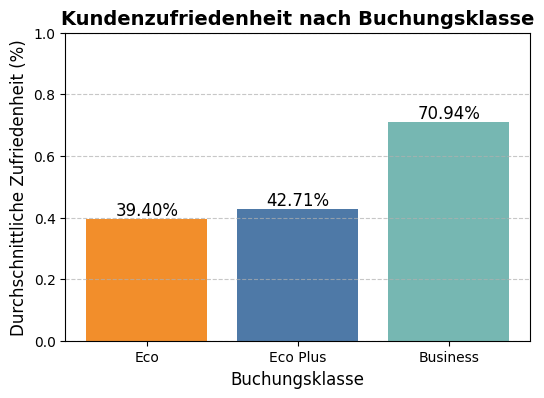

In [4]:
# Frage: Gibt es signifikante Unterschiede in der Kundenzufriedenheit zwischen Economy-, Business- und First-Class-Passagieren?
# Ziel: Erkennen, ob bestimmte Buchungsklassen überproportional unzufriedene Kunden haben.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway  # ANOVA-Test

# Daten laden
url = "https://raw.githubusercontent.com/DivinitasMaxima/BINA-REPO/refs/heads/main/data/data/Invistico_Airline.csv"
df = pd.read_csv(url)

# Umwandlung der Zufriedenheits-Spalte in numerische Werte
df["satisfaction"] = df["satisfaction"].map({"satisfied": 1, "dissatisfied": 0})

# Mittelwerte der Zufriedenheit pro Buchungsklasse berechnen
class_satisfaction = df.groupby("Class")["satisfaction"].mean().sort_values()

# IBCS-konforme Visualisierung
plt.figure(figsize=(6, 4))
colors = ["#F28E2B", "#4E79A7", "#76B7B2"]  # Orange für Economy, Blau für Business, Grün für First
bars = plt.bar(class_satisfaction.index, class_satisfaction.values, color=colors)

# Werte auf den Balken anzeigen
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{bar.get_height():.2%}",
             ha='center', va='bottom', fontsize=12, color="black")

# Titel & Achsenbeschriftungen (IBCS-konform)
plt.ylabel("Durchschnittliche Zufriedenheit (%)", fontsize=12)
plt.xlabel("Buchungsklasse", fontsize=12)
plt.title("Kundenzufriedenheit nach Buchungsklasse", fontsize=14, weight='bold')
plt.ylim(0, 1)  # Skala 0-100%
plt.grid(axis='y', linestyle="--", alpha=0.7)  # Dezente Hilfslinien

plt.show()

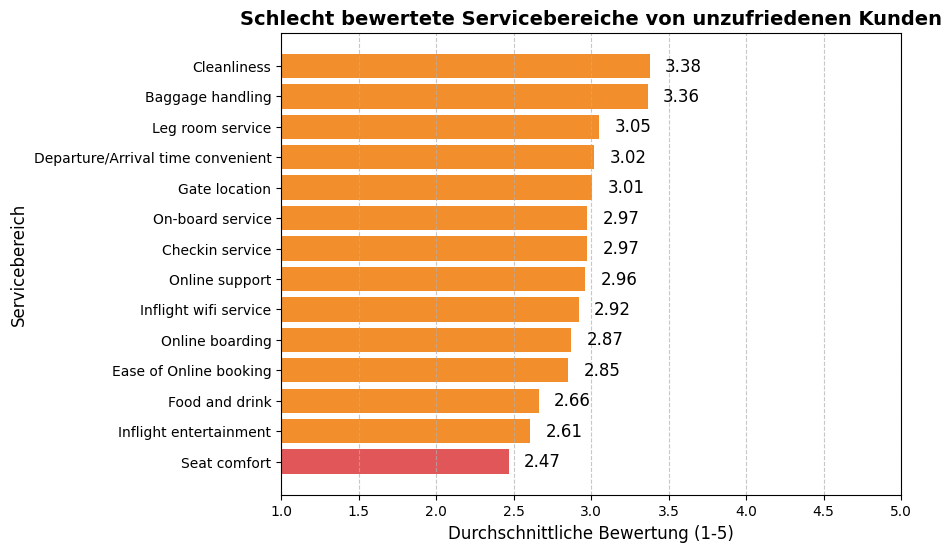

In [5]:
# Frage: Welche Servicebereiche haben die meisten negativen Bewertungen von unzufriedenen Kunden?
# Ziel: Fokus auf die größten Schwachstellen, die am häufigsten zur Unzufriedenheit führen.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Daten laden
url = "https://raw.githubusercontent.com/DivinitasMaxima/BINA-REPO/refs/heads/main/data/data/Invistico_Airline.csv"
df = pd.read_csv(url)

# Umwandlung der Zufriedenheits-Spalte in numerische Werte
df["satisfaction"] = df["satisfaction"].map({"satisfied": 1, "dissatisfied": 0})

# Liste der Servicekategorien (numerische Bewertungen)
service_columns = [
    "Inflight wifi service", "Departure/Arrival time convenient", "Ease of Online booking",
    "Gate location", "Food and drink", "Online boarding", "Seat comfort",
    "Inflight entertainment", "On-board service", "Leg room service",
    "Baggage handling", "Checkin service", "Cleanliness", "Online support"
]

# Daten filtern: Nur unzufriedene Kunden
df_dissatisfied = df[df["satisfaction"] == 0]

# Durchschnittliche Bewertung der Servicebereiche berechnen
service_means = df_dissatisfied[service_columns].mean().sort_values()

# IBCS-konforme Visualisierung (horizontale Balkendiagramme)
plt.figure(figsize=(8, 6))
colors = ["#E15759" if x < 2.5 else "#F28E2B" for x in service_means]  # Rot für schlechte Werte, Orange für mittelmäßig

bars = plt.barh(service_means.index, service_means.values, color=colors)

# Werte auf Balken anzeigen
for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.2f}", va="center", fontsize=12)

# Titel & Achsenbeschriftungen
plt.xlabel("Durchschnittliche Bewertung (1-5)", fontsize=12)
plt.ylabel("Servicebereich", fontsize=12)
plt.title("Schlecht bewertete Servicebereiche von unzufriedenen Kunden", fontsize=14, weight='bold')
plt.xlim(1, 5)  # Skala 1-5
plt.grid(axis='x', linestyle="--", alpha=0.7)

plt.show()